# Clustering Crypto

In [37]:
# Initial imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Fetching Cryptocurrency Data

In [38]:
# Use the following endpoint to fetch json data
url = "https://min-api.cryptocompare.com/data/all/coinlist"

In [39]:
# Create a DataFrame 
# HINT: You will need to use the 'Data' key from the json response, then transpose the DataFrame.
response_data = requests.get(url)

# Get content
response_content = response_data.content

import json

# Formatting as json
data = response_data.json()

# Add indents to JSON and output to screen
# print(json.dumps(data, indent=4))

# Create a Dataframe
df = pd.DataFrame(data['Data'])

# Transpose DF
crypto_df = df.T
crypto_df.head()

,Algorithm,AssetLaunchDate,AssetTokenStatus,BlockNumber,BlockReward,BlockTime,BuiltOn,CoinName,ContentCreatedOn,DecimalPoints,...,PlatformType,ProofType,Rating,SmartContractAddress,SortOrder,Sponsored,Symbol,Taxonomy,TotalCoinsMined,Url
42,Scrypt,0000-00-00,N/A,0,0,0,NaN,42 Coin,1427211129,NaN,...,NaN,PoW/PoS,"{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",NaN,34,False,42,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...",0,/coins/42/overview
300,N/A,2017-07-01,N/A,0,0,0,ETH,300 token,1517935016,18,...,token,N/A,"{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",0xaec98a708810414878c3bcdf46aad31ded4a4557,2212,False,300,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...",300,/coins/300/overview
365,X11,0000-00-00,N/A,0,0,0,NaN,365Coin,1480032918,NaN,...,NaN,PoW/PoS,"{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",NaN,916,False,365,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...",0,/coins/365/overview
404,Scrypt,0000-00-00,N/A,0,0,0,NaN,404Coin,1466100361,NaN,...,NaN,PoW/PoS,"{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",NaN,602,False,404,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...",0,/coins/404/overview
433,N/A,NaN,Finished,NaN,NaN,NaN,NaN,433 Token,1541597321,NaN,...,NaN,N/A,"{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",NaN,3505,False,433,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...",NaN,/coins/433/overview


In [40]:
# Alternatively, use the provided csv file:
# file_path = Path("Resources/crypto_data.csv")

# Create a DataFrame

### Data Preprocessing

In [41]:
crypto_df.columns

Index(['Algorithm', 'AssetLaunchDate', 'AssetTokenStatus', 'BlockNumber',
       'BlockReward', 'BlockTime', 'BuiltOn', 'CoinName', 'ContentCreatedOn',
       'DecimalPoints', 'Description', 'Difficulty', 'FullName', 'Id',
       'ImageUrl', 'IsTrading', 'IsUsedInDefi', 'IsUsedInNft', 'MaxSupply',
       'MktCapPenalty', 'Name', 'NetHashesPerSecond', 'PlatformType',
       'ProofType', 'Rating', 'SmartContractAddress', 'SortOrder', 'Sponsored',
       'Symbol', 'Taxonomy', 'TotalCoinsMined', 'Url'],
      dtype='object')

In [42]:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'
c_df = crypto_df[['CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','MaxSupply']]
c_df['MaxSupply'].count()
c_df.shape

(6303, 6)

In [43]:
# Keep only cryptocurrencies that are trading
cr_df = c_df[c_df.IsTrading == True]
cr_df.shape

(5024, 6)

In [44]:
# Keep only cryptocurrencies with a working algorithm
cry_df = cr_df[cr_df.Algorithm != 'N/A']
cry_df.head(25)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,MaxSupply
42,42 Coin,Scrypt,True,PoW/PoS,0,0
365,365Coin,X11,True,PoW/PoS,0,0
404,404Coin,Scrypt,True,PoW/PoS,0,0
611,SixEleven,SHA-256,True,PoW,0,0
808,808,SHA-256,True,PoW/PoS,0,0
1337,EliteCoin,X13,True,PoW/PoS,0,0
2015,2015 coin,X11,True,PoW/PoS,0,0
BTCD,BitcoinDark,SHA-256,True,PoW/PoS,NaN,NaN
CRAIG,CraigsCoin,X11,True,PoS,NaN,NaN
XBS,Bitstake,X11,True,PoW/PoS,NaN,NaN


In [45]:
# Remove the "IsTrading" column
cry_df.drop(['IsTrading'], axis=1, inplace=True)
cry_df.shape

/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



(1487, 5)

In [46]:
# Remove rows with at least 1 null value
cry_df.dropna(inplace=True)
cry_df.shape

/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



(279, 5)

In [47]:
# Remove rows with cryptocurrencies having no coins mined
cryp_df = cry_df[cry_df.TotalCoinsMined > 0]
cryp_df.shape

(136, 5)

In [48]:
# Remove rows with 'N/A' values
crypt_df = cryp_df[cryp_df != 'N/A']
crypt_df.shape

(136, 5)

In [49]:
# Remove rows with at least 1 null value - AGAIN SINCE NULL VALUES RE_EMERGE
crypt_df.dropna(inplace=True)
crypt_df.shape

(118, 5)

In [50]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df
coins_name_df = crypt_df['CoinName']
coins_name_df.head()

NVC           NovaCoin
XCP       CounterParty
NSR           NuShares
MONA          MonaCoin
TRI     Triangles Coin
Name: CoinName, dtype: object

In [51]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
crypt_df.drop(['CoinName'], axis=1, inplace=True)

In [52]:
crypt_df.head(25)

,Algorithm,ProofType,TotalCoinsMined,MaxSupply
NVC,Scrypt,PoW/PoS,3196718.50,-1
XCP,SHA-256,PoW,2615081.35,-1
NSR,PoS,PoS,5855759270.07,0
MONA,Scrypt,PoW,81167037.47,-1
TRI,X13,PoW/PoS,175041.49,0
EMC,SHA-256,PoW/PoS,47209766.01,-1
SAFEX,Scrypt,PoC,2147483647,-1
CMTC,Scrypt,PoW,872830,0
XSN,X11,TPoS,118875584.01,-1
CHAT,Scrypt,PoW/PoS,1000000000,-1


In [53]:
# Create dummy variables for text features
X = pd.get_dummies(crypt_df, columns=['Algorithm', 'ProofType'])
X.head()

,TotalCoinsMined,MaxSupply,Algorithm_BEP-2,Algorithm_BLAKE256,Algorithm_BMW512 / Echo512,Algorithm_Blake2B + SHA3,Algorithm_Blake2b,Algorithm_C31,Algorithm_CryptoNight,Algorithm_CryptoNight-Heavy,...,ProofType_PoW,ProofType_PoW/PoS,ProofType_PoW/PoSe,ProofType_PoW/nPoS,ProofType_Proof of Authority,ProofType_SPoS,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW,ProofType_mPoW
NVC,3196718.50,-1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
XCP,2615081.35,-1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
NSR,5855759270.07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MONA,81167037.47,-1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
TRI,175041.49,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [54]:
# Standardize data
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:3]

array([[-0.17595763, -0.13641368, -0.09245003, -0.13130643, -0.09245003,
        -0.09245003, -0.13130643, -0.13130643, -0.13130643, -0.09245003,
        -0.09245003, -0.2511236 , -0.13130643, -0.09245003, -0.09245003,
        -0.09245003, -0.30429031, -0.09245003, -0.21035158, -0.09245003,
        -0.09245003, -0.13130643, -0.09245003, -0.09245003, -0.09245003,
        -0.09245003, -0.09245003, -0.16151457, -0.09245003, -0.09245003,
        -0.13130643, -0.16151457, -0.09245003, -0.16151457, -0.13130643,
        -0.33646329, -0.13130643, -0.09245003, -0.09245003, -0.09245003,
         2.3570226 , -0.09245003, -0.09245003, -0.09245003, -0.09245003,
        -0.09245003, -0.18731716, -0.09245003, -0.21035158, -0.09245003,
        -0.09245003, -0.09245003, -0.09245003, -0.26967994, -0.09245003,
        -0.09245003, -0.13130643, -0.13130643, -0.09245003, -0.28734789,
        -0.09245003, -0.09245003, -1.        ,  2.03234711, -0.09245003,
        -0.09245003, -0.09245003, -0.09245003, -0.0

### Reducing Dimensions Using PCA

In [55]:
# Use PCA to reduce dimensions to 3 principal components
pca = PCA(n_components=3)
crypto_scaled_pca = pca.fit_transform(X_scaled)
crypto_scaled_pca[:5]

array([[-1.23581897, -0.74227295, -0.33264758],
       [ 1.69382053, -0.15067823, -0.02463105],
       [-1.26921063, -0.01203124, -0.48430154],
       [ 0.74799402, -0.68285615, -0.21286348],
       [-1.97756711, -0.67439412, -0.38834843]])

In [56]:
# Create a DataFrame with the principal components data
pcs_df = pd.DataFrame(crypto_scaled_pca, columns=['PC 1', 'PC 2', 'PC 3'])
pcs_df.index = X.index
pcs_df.head()

,PC 1,PC 2,PC 3
NVC,-1.24,-0.74,-0.33
XCP,1.69,-0.15,-0.02
NSR,-1.27,-0.01,-0.48
MONA,0.75,-0.68,-0.21
TRI,-1.98,-0.67,-0.39


### Clustering Crytocurrencies Using K-Means

#### Find the Best Value for `k` Using the Elbow Curve

In [57]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Create the Elbow Curve using hvPlot
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

Running K-Means with `k=<your best value for k here>`

In [58]:
# Initialize the K-Means model
model = KMeans(n_clusters=5, random_state=5)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)

# Create a new DataFrame including predicted clusters and cryptocurrencies features
clustered_df = crypt_df.join(pcs_df).join(coins_name_df)
clustered_df['class'] = model.labels_
clustered_df.head()

,Algorithm,ProofType,TotalCoinsMined,MaxSupply,PC 1,PC 2,PC 3,CoinName,class
NVC,Scrypt,PoW/PoS,3196718.50,-1,-1.24,-0.74,-0.33,NovaCoin,1
XCP,SHA-256,PoW,2615081.35,-1,1.69,-0.15,-0.02,CounterParty,0
NSR,PoS,PoS,5855759270.07,0,-1.27,-0.01,-0.48,NuShares,1
MONA,Scrypt,PoW,81167037.47,-1,0.75,-0.68,-0.21,MonaCoin,0
TRI,X13,PoW/PoS,175041.49,0,-1.98,-0.67,-0.39,Triangles Coin,1


### Visualizing Results

#### 3D-Scatter with Clusters

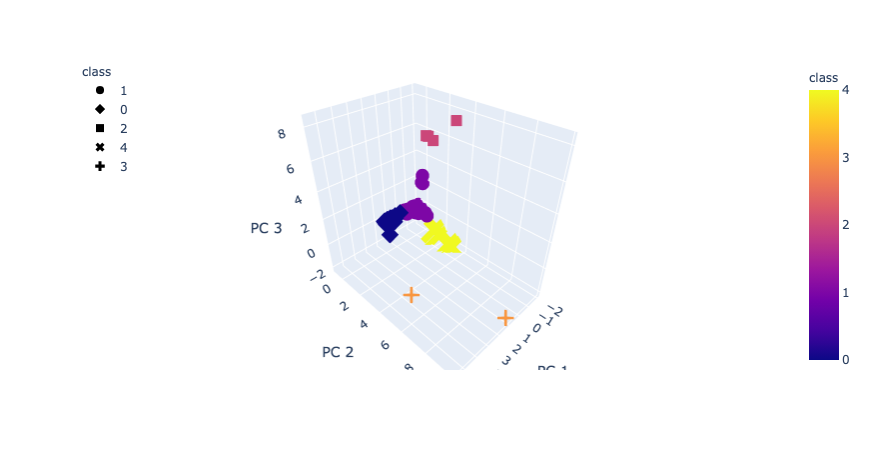

In [59]:
# Create a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    color="class",
    symbol="class",
    width=800,
    hover_name="CoinName",
    hover_data=["Algorithm"],
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

#### Table of Tradable Cryptocurrencies

In [60]:
# Table with tradable cryptos
# Convert 
c_df["TotalCoinsMined"] = c_df.TotalCoinsMined.astype(float)
c_df["MaxSupply"] = c_df.MaxSupply.astype(float)
pd.set_option('display.float_format','{:.2f}'.format)

clustered_df.hvplot.table(columns=["CoinName", 
                                   "Algorithm",
                                   "ProofType", 
                                   "MaxSupply", 
                                   "TotalCoinsMined", 
                                   "class"],
                            sortable=True, 
                            selectable=True)

/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



:Table   [CoinName,Algorithm,ProofType,MaxSupply,TotalCoinsMined,class]

In [61]:
# Print the total number of tradable cryptocurrencies
print(f"The total number of tradable cryptocurrencies: {clustered_df.CoinName.count()}")

The total number of tradable cryptocurrencies: 118


#### Scatter Plot with Tradable Cryptocurrencies

In [62]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
scatter = clustered_df.hvplot.scatter(x="TotalCoinsMined", y="MaxSupply", hover_cols=["CoinName"])
scatter.relabel('Tradable crypto scatter plot').opts(xformatter='%.2f', yformatter='%.2f', xrotation=45, height=400)

:Scatter   [TotalCoinsMined]   (MaxSupply,CoinName)